In [1]:
import os, sys
project_root_dir = os.path.join(os.getcwd(),'../..')
if project_root_dir not in sys.path:
    sys.path.append(project_root_dir)

from matplotlib import pyplot as plt
import numpy as np
import torch
import config

from HySpecLab.metrics import rmse, sad

In [8]:
from dataset import JasperRidge
dataset = JasperRidge(config.JasperRidge_PATH)

result_path = os.path.join(config.RESULTS_PATH, 'jasperRidge/egu-net/result')
X_true = dataset.A@dataset.endmembers()

In [33]:
dataset.n_col

100

# Endmember Estimation

In [19]:
M_est = np.load(os.path.join(result_path, 'M_Estimation.npy'))

sad_result_vca = sad(torch.tensor(M_est, dtype=torch.float32), dataset.endmembers())

In [28]:
print(sad_result_vca, np.diagonal(sad_result_vca.numpy()).mean())

sad_result = np.diagonal(sad_result_vca.numpy()).mean()
sad_result

tensor([[0.0569, 1.1303, 0.3843, 0.5115],
        [0.6168, 0.6601, 0.4201, 0.2448],
        [0.3562, 1.0747, 0.0836, 0.2697],
        [0.4648, 0.9854, 0.1138, 0.1256]]) 0.23153019


0.23153019

# Reconstruction

In [49]:
rmse_Y = np.zeros(10)
for i in range(10):
    Y_est = torch.tensor(np.load(os.path.join(result_path, 'Y_Estimation/{}.npy'.format(i))), dtype=torch.float32)
    rmse_Y[i] = rmse(X_true, Y_est, dim=None).numpy()

print(rmse_Y.mean(), rmse_Y.std())

0.06564733311533928 0.002515087661536075


# Abundance Estimation

In [75]:
rmse_A = np.zeros(10)
for i in range(10):
    A_est = torch.tensor(np.load(os.path.join(result_path, 'A_Estimation/{}.npy'.format(i))), dtype=torch.float32)
    rmse_A[i] = rmse(dataset.A, A_est, dim=None).numpy()

print(rmse_A.mean(), rmse_A.std())

0.14663679301738738 0.003287904857518303


# Save Results

In [77]:
import pandas as pd 

df = pd.DataFrame({'RMSE_X':rmse_Y.mean(), 'RMSE_X_std':rmse_Y.std(), 'RMSE_A':rmse_A.mean(), 'RMSE_A_std':rmse_A.std(), 'SAD_M':sad_result}, index=[0])
df.to_csv(os.path.join(result_path, 'metrics.csv'), index=False)

# Images

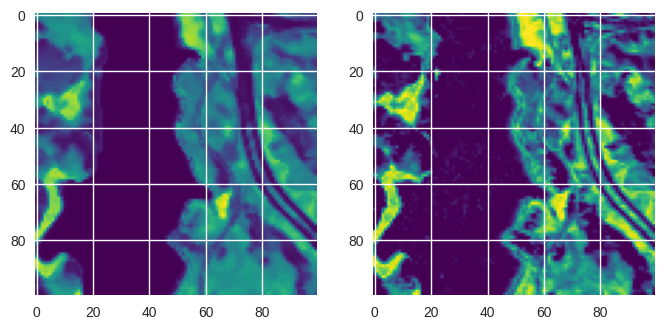

In [67]:
# plt.imshow(dataset.A.numpy().reshape(dataset.n_col, dataset.n_row, -1, order='F'), cmap='jet')
plt.subplot(1, 2, 1)
plt.imshow(A_est.numpy().reshape(dataset.n_col, dataset.n_row, -1, order='F')[..., 2], cmap='viridis')
plt.subplot(1, 2, 2)
plt.imshow(dataset.A.numpy().reshape(dataset.n_col, dataset.n_row, -1, order='F')[..., 2], cmap='viridis')
plt.show()

In [74]:
A_est[:, 3].max()

tensor(0.6720)

In [54]:
dataset.A.max()

tensor(1.)